Credit card fraud detection, cancer prediction, customer churn prediction are some of the examples where you might get an imbalanced dataset. Training a model on imbalanced dataset requires making certain adjustments otherwise the model will not perform as per your expectations. In this video I am discussing various techniques to handle imbalanced dataset in machine learning.

https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files


uploaded = files.upload()

Saving Customer_Churn_DL10.csv to Customer_Churn_DL10.csv


In [70]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Customer_Churn_DL10.csv']))
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2015,5155-AZQPB,Female,0,Yes,Yes,28,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,49.90,1410.25,No
1360,3793-MMFUH,Female,1,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,1290,Yes
2184,4695-WJZUE,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,Yes
4060,0757-WCUUZ,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.1,No
6037,7537-CBQUZ,Male,1,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.40,7031.45,No


In [71]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [72]:
517400/df.shape[0]

73.46301292063042

In [73]:
# data exploration
# customer id irrelevant,drop it
df.drop('customerID', axis= 'columns', inplace= True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [74]:
# total charges is object,should be float
df.TotalCharges.values
# are a string convert to a number

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [75]:
df.MonthlyCharges.values
# are numbers

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [76]:
# convetr total charges too a number
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [77]:
# error due to a white space in the data
# look for it
# see rows with spaces
# errors = 'coerce', ignores the errors
pd.to_numeric(df.TotalCharges, errors= 'coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [78]:
# see rows with null values
df[pd.to_numeric(df.TotalCharges, errors= 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [80]:
# see specific index summary
df.iloc[488] 

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [81]:
df.iloc[488].TotalCharges

' '

In [83]:
# drop the rows with blank in TotalCharges
df1 = df[df.TotalCharges != ' ']
df1.shape


(7032, 20)

In [84]:
df.shape

(7043, 20)

In [85]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [86]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [87]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [88]:
df1.TotalCharges.dtypes

dtype('float64')

In [89]:
df1[df1.Churn== 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [92]:
# see customers who are not leaving ande their tenure
tenure_churn_no = df1[df1.Churn== 'No'].tenure
tenure_churn_yes = df1[df1.Churn== 'Yes'].tenure

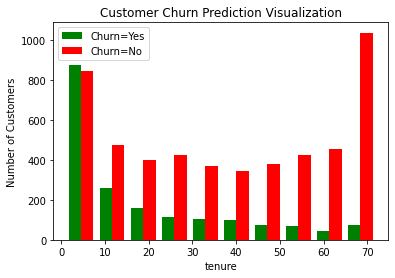

In [93]:
# visualization
# use tenure column
# use histogram.

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color= ['green', 'red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

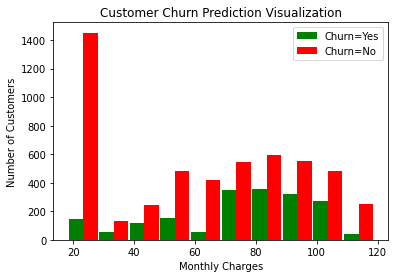

In [94]:
# similar plot for monthly charges
mc_churn_no = df1[df1.Churn== 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn== 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95, color= ['green', 'red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()



In [95]:
# many of the columns have yes and no
# find unique values thhen do label encoding
# use for loop to print ALl columns
for column in df:
    if df[column].dtypes== 'object': # print only of type object
        print(f'{column} : {df[column].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [97]:
# many columns with no yes values
# function to print unique column values
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes== 'object': # print only of type object
            print(f'{column} : {df[column].unique()}')

In [98]:
# call function on df1
# print unique values of columns in df1
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [99]:
# No internet service and no phone service same as no
# hence replace it with no
df1.replace("No internet service", "No", inplace= True)
df1.replace("No phone service", "No", inplace= True)


In [100]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [101]:
# replace yes and no with 1 and 0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# a replace loop
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace= True)

In [102]:
# print unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [103]:
# convert female and male to 0 and 1
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace= True)

In [104]:
df1['gender'].unique()

array([1, 0])

In [105]:
# use one hot encoding for columns with more than two unique text values
pd.get_dummies(data= df1, columns=["InternetService"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [106]:
# create a new df to store values of encoded columns
df2 = pd.get_dummies(data= df1, columns=["InternetService", "Contract", "PaymentMethod"])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [107]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6720,0,0,1,1,70,1,1,0,1,1,1,1,1,1,84.10,5979.70,0,1,0,0,0,0,1,0,0,1,0
6863,1,0,1,0,48,1,1,1,0,0,1,0,0,1,60.60,2985.25,0,1,0,0,0,1,0,1,0,0,0
6386,0,0,1,1,72,1,1,1,0,1,1,1,1,1,83.55,6093.30,0,1,0,0,0,0,1,0,1,0,0
5682,1,0,1,0,1,0,0,0,0,0,0,0,1,0,35.00,35.00,0,1,0,0,1,0,0,0,0,1,0


In [108]:
# check data types
df2.dtypes 

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [109]:
# scalling data(tenure,monthlycharge, totalcharge)
# use minmax scaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# converts in the range of 0-1

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [110]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2473,1,0,1,1,0.070423,1,0,0,0,0,0,0,0,0,0.015920,0.011597,0,0,0,1,1,0,0,0,0,0,1
6204,0,0,0,0,0.169014,0,0,0,0,0,0,0,0,1,0.068657,0.036124,0,1,0,0,1,0,0,1,0,0,0
1253,1,0,0,0,0.084507,1,0,0,0,0,0,0,1,1,0.607463,0.058199,1,0,1,0,1,0,0,0,0,1,0


In [111]:
# print unique values
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# use in machine learning model

In [115]:
# define X and y
X = df2.drop('Churn', axis= 'columns')
y = testLabels = df2.Churn.astype(np.float32)

In [116]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [117]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [118]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [120]:
5163/1869

2.7624398073836276

In [121]:
X_train.shape

(5625, 26)

In [122]:
X_test.shape

(1407, 26)

In [123]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.525871,0.006035,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,0,1,0,1,0.713930,0.174077,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,0,0,0,1,0.061692,0.163034,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,1,1,1,1,0.607960,0.661718,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,1,0,1,0,0.298507,0.021169,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,0,1,1,1,0.774627,0.501419,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,0,0,0,1,0.018905,0.000156,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,0,1,1,1,0.760697,0.218798,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,0,0,0,0,0.113433,0.008222,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,0,1,1,1,0.738806,0.398638,0,1,0,1,0,0,0,0,1,0


In [124]:
len(X_train.columns)

26

In [41]:
import tensorflow as tf
from tensorflow import keras


# create model
model = keras.Sequential([
    # inputt layer
    keras.layers.Dense(20, input_shape=(26,), activation= 'relu'),
    # hidden layer
    # keras.layers.Dense(15, activation= 'relu'),
    # output layer
    keras.layers.Dense(1, activation= 'sigmoid')


])

model.compile(optimizer='adam',
              loss= 'binary_crossentropy', 
              metrics= ['accuracy'])


model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7056
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8059
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accura

In [42]:
# evaluate model
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7903


[0.45084887742996216, 0.7903340458869934]

In [43]:
# test model
yp = model.predict(X_test)
yp[:5]

array([[0.19804505],
       [0.4987939 ],
       [0.00730491],
       [0.6852776 ],
       [0.33574924]], dtype=float32)

In [44]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [45]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [46]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [47]:
# print classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

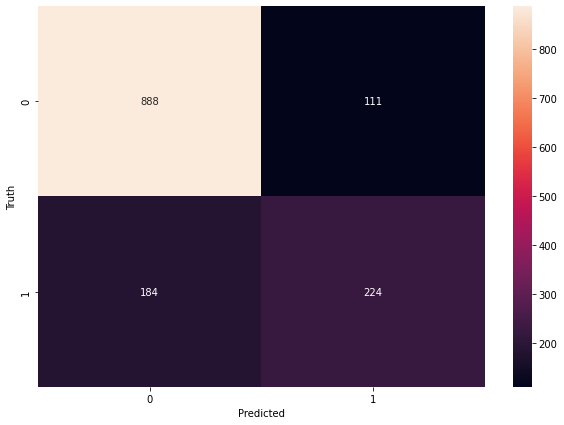

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred)


plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
# accuracy
round((891+211)/(197+211+891+108), 2)

0.78

In [50]:
# precision for class 0
round(891/(891+197), 2)

0.82

In [51]:
# precision for class 1
round(211/(211+108), 2)

0.66

In [52]:
# recall class 0
# total truths
round(891/(891+108), 2)

0.89

In [53]:
# recall for 1
round(211/(197+211), 2)

0.52

Exercise
Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

#### handling imbalance in dataset by improving aaccuracy of class 1 from 60%

In [55]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [125]:
# build a model ANN in tensorflow/keras
from tensorflow_addons import losses

In [126]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [127]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs= 100)
  else:
    model.fit(X_train, y_train, epochs= 100, class_weight= weights)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("classification Report: \n", classification_report(y_test, y_preds))


  return y_preds

In [128]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4978 - accuracy: 0.7586
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.7925
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7963
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.7966
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8007
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8016
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accura

# Mitigating Skewdness of Data

Method 1: Undersampling


https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets


In [129]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [131]:
# for 0 class we take only 374 samples and train our model
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# ddivide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [136]:
count_class_0, count_class_1

(5163, 1869)

In [132]:
df_class_0.shape

(5163, 27)

In [133]:
df_class_1.shape

(1869, 27)

In [135]:
# bias in classes observed
# undersample 0 class
df_class_0.sample(2)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5485,0,0,0,0,0.000000,1,0,1,0,0,0,0,0,1,0.323383,0.003687,0,1,0,0,1,0,0,0,0,0,1
906,0,0,0,0,0.042254,1,0,0,0,0,0,1,0,1,0.379602,0.024931,0,1,0,0,1,0,0,0,0,1,0


In [140]:
# sample class 0 with same samples as class 1
df_class_0_under = df_class_0.sample(count_class_1)

# concat class_0_under And class 1
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

# both classes have same number of samples.

print('Random under-sampling')
print(df_test_under.Churn.value_counts())

Random under-sampling
1    1869
0    1869
Name: Churn, dtype: int64


In [144]:
# create X and y from the data
X = df_test_under.drop('Churn', axis= 'columns')
y = df_test_under['Churn']

# train test fiit, stratify = y ensures we have balanced samples
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [145]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [147]:
# train model using method
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6323 - accuracy: 0.6428
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7552
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7669
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7736
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7796
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7779
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7753
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7809
Epoch 11/

F1 score for class 1 improves from 0.53 to 0.75

# Method 2: Oversampling

In [148]:
count_class_0, count_class_1

(5163, 1869)

In [154]:
df_class_1.shape
# reshape this

(1869, 27)

In [158]:
# reshaping
df_class_1_over = df_class_1.sample(count_class_0, replace= True)
df_class_1_over.shape

(5163, 27)

In [160]:
# concat class 0 and 1
df_test_over = pd.concat([df_class_0,df_class_1_over], axis= 0)


print('Random over-sampling')
print(df_test_over.Churn.value_counts())

Random over-sampling
1    5163
0    5163
Name: Churn, dtype: int64


In [161]:
# create X and y from the data
X = df_test_over.drop('Churn', axis= 'columns')
y = df_test_over['Churn']

# train test fiit, stratify = y ensures we have balanced samples
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [163]:
y_train.value_counts()
# eaual class distribution

1    4130
0    4130
Name: Churn, dtype: int64

In [165]:
# train model using method
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5444 - accuracy: 0.7280
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4887 - accuracy: 0.7666
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7680
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7718
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7753
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7778
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7810
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7812
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7826
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4586 - accura

F! score for class 1 impproves to 79%

# METHOD 3:SMOTE(OVERSAMPLING BY PRODUCING SYNTHETIC SAMPLES)

creates new samples from current samples using k nearest means alg

In [172]:
# get x and y
X = df2.drop('Churn', axis= 'columns')
y = df2['Churn']

In [168]:
pip install imblearn

In [173]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [175]:
# use imblearn
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [177]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size= 0.2, random_state= 15, stratify= y_sm)

In [179]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [180]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [181]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7444
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7753
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.7793
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.7845
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.7855
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7863
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7927
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7942
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7993
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4304 - accura

F1 score for classs 1 improves to 80%


# METHOD 4: USE ENSEMBLE WITH UNDERSAMPLING

In [182]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [183]:
# get x and y
X = df2.drop('Churn', axis= 'columns')
y = df2['Churn']

In [184]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [185]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [186]:
# imbalance
4130/1495

2.762541806020067

In [187]:
# divide 0 class in three batches
4130/3

1376.6666666666667

In [192]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [193]:
# divide in 1376 batches
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [194]:
# do ensemble now
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [201]:
# df_train = pd.concat([df3_class0[:1495], df3_class1], axis= 0)
# df_train.shape

# # do this three times

In [205]:
# use a function
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis= 0)
  
  X_train = df_train.drop('Churn', axis= 'columns')
  y_train = df_train.Churn

  return X_train, y_train

In [210]:
# create first batch
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6576 - accuracy: 0.6458
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7736
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7779
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7819
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7783
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7759
Epoch 11/

59% F1 for class1


In [211]:
# model 2
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.6401
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7676
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7726
Epoch 11/

57% F1 score for class 1

In [212]:
# model 3
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6024 - accuracy: 0.6702
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7518
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7658
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7655
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7696
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7757
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7731
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7757
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7765
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7784
Epoch 11/

56% F1 score for class 1

In [214]:
# taking the majority vote
# anything >1 means majority vote is 1


In [213]:
len(y_pred1)

1407

In [215]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [216]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77      1033
           1       0.46      0.77      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.72      0.67      1407
weighted avg       0.78      0.70      0.72      1407



f1-score for minority class 1 improved to 0.58 from 0.53. The score for majority class 0 is suffering and reduced to 0.77 from 0.87 but at least there is some balance in terms of prediction accuracy across two classes

# Exercise

 Handling imbalanced data in machine learning

1. Use this notebook but handle imbalanced data using simple logistic regression from skelarn library. The original notebook using neural network but you need to use sklearn logistic regression or any other classification model and improve the f1-score of minority class using,


1.   Undersampling
2.   Oversampling: duplicate copy
3.   OVersampling: SMOT
4.   Ensemble

solution: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/14_imbalanced/handling_imbalanced_data_exercise_solution_telecom_churn.ipynb


2.Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1.  Build a deep learning model to predict churn rate at bank
2.  Once model is built, print classification report and analyze precision, recall and f1-score
3.  Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc

solution:https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/14_imbalanced/Handling%20Imbalanced%20Data%20In%20Customer%20Churn%20Using%20ANN/Bank%20Turnover%20Customer%20Churn%20Using%20ANN.ipynb


Discuss applications of computer vision